In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [2]:
data_test=pd.read_csv("../app/data/02_test.csv",encoding="iso-8859-1", low_memory=False, delimiter=";")
data_train=pd.read_csv("../app/data/02_train.csv",encoding="iso-8859-1", low_memory=False, delimiter=";")

In [3]:
data_test.head()

,Lng,Lat,square,livingRoom,drawingRoom,kitchen,bathRoom,floor,buildingType,renovationCondition,...,placeRank,town,districtPopulation,districtArea,tradeYear,tradeMonth,tradeDay,floorType,constructionTimePeriod,totalPrice
0,116.432684,40.077562,104.02,2,1,1,1,6,118742,81441,...,133606,219943,2269487.0,1430.0,2015,11,21,82499,52625,237.5
1,116.432684,40.077562,102.27,2,1,1,1,20,58087,81641,...,133606,219943,2269487.0,1430.0,2013,7,27,82499,52625,210.0
2,116.438800,40.054941,53.00,2,1,1,2,17,41617,81441,...,81988,219943,3452460.0,470.8,2016,10,19,44240,52625,462.0
3,116.364866,39.964032,64.90,2,1,1,1,6,118742,81441,...,133606,219943,1106214.0,46.5,2016,7,5,82499,16497,390.0
4,116.364028,39.870465,69.10,2,2,1,1,6,118742,53150,...,81988,219943,1106214.0,46.5,2016,2,22,25725,136686,246.0


In [6]:
data_test.where(data_test["totalPrice"]<1).dropna()
#data_test=data_test[data_test["totalPrice"]>1]

,Lng,Lat,square,livingRoom,drawingRoom,kitchen,bathRoom,floor,buildingType,renovationCondition,...,placeRank,town,districtPopulation,districtArea,tradeYear,tradeMonth,tradeDay,floorType,constructionTimePeriod,totalPrice
3595,116.269851,39.897262,45.99,1.0,1.0,1.0,1.0,6.0,118742.0,81641.0,...,133606.0,219943.0,3133469.0,426.0,2011.0,11.0,23.0,82499.0,136686.0,0.1
4284,116.361669,39.934204,68.90,3.0,1.0,1.0,1.0,6.0,118742.0,81641.0,...,133606.0,219943.0,1106214.0,46.5,2011.0,12.0,10.0,25725.0,136686.0,0.1
5760,116.457814,39.770511,95.77,2.0,1.0,1.0,1.0,16.0,41617.0,81641.0,...,133606.0,219943.0,1993591.0,1012.0,2012.0,6.0,4.0,82499.0,136686.0,0.1
6478,116.368607,39.848997,78.79,3.0,2.0,1.0,2.0,6.0,118742.0,81641.0,...,133606.0,219943.0,2019764.0,304.2,2013.0,1.0,7.0,25725.0,136686.0,0.1
6529,116.303130,39.950488,57.60,2.0,1.0,1.0,1.0,21.0,58087.0,81441.0,...,81988.0,219943.0,3133469.0,426.0,2014.0,10.0,25.0,48571.0,136686.0,0.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87106,116.475046,39.882090,56.94,2.0,1.0,1.0,1.0,6.0,118742.0,81641.0,...,133606.0,219943.0,3452460.0,470.8,2011.0,10.0,7.0,82499.0,16497.0,0.1
89372,116.381497,39.977750,45.80,1.0,1.0,1.0,1.0,9.0,41617.0,81641.0,...,81988.0,219943.0,3452460.0,470.8,2014.0,9.0,16.0,44240.0,136686.0,0.2
89933,116.498241,39.971858,49.49,1.0,1.0,0.0,1.0,21.0,41617.0,53150.0,...,133606.0,219943.0,3452460.0,470.8,2015.0,4.0,17.0,82499.0,52625.0,0.1
90055,116.352166,39.920264,38.70,1.0,1.0,1.0,1.0,16.0,58087.0,81641.0,...,133606.0,219943.0,1106214.0,46.5,2011.0,10.0,15.0,82499.0,136686.0,0.1


In [7]:
data_test.where(data_test["totalPrice"]>3000).dropna()

,Lng,Lat,square,livingRoom,drawingRoom,kitchen,bathRoom,floor,buildingType,renovationCondition,...,placeRank,town,districtPopulation,districtArea,tradeYear,tradeMonth,tradeDay,floorType,constructionTimePeriod,totalPrice
18475,116.353679,39.908116,285.84,4.0,2.0,1.0,2.0,16.0,58087.0,81441.0,...,133606.0,219943.0,1106214.0,46.5,2016.0,9.0,2.0,44240.0,52625.0,3300.0
28715,116.466282,39.972255,586.00,4.0,2.0,1.0,4.0,23.0,118742.0,81441.0,...,133606.0,219943.0,3452460.0,470.8,2016.0,10.0,15.0,18058.0,52625.0,3050.0
30719,116.433036,40.021767,494.66,5.0,3.0,1.0,4.0,3.0,1497.0,81441.0,...,81988.0,219943.0,3452460.0,470.8,2017.0,4.0,6.0,18058.0,136686.0,3500.0
33194,116.437966,40.018379,574.24,5.0,3.0,2.0,7.0,3.0,1497.0,81441.0,...,81988.0,219943.0,3452460.0,470.8,2016.0,3.0,8.0,18058.0,52625.0,4350.0
44164,116.340959,39.994651,339.20,4.0,3.0,2.0,4.0,20.0,58087.0,81441.0,...,81988.0,219943.0,3133469.0,426.0,2015.0,7.0,11.0,44240.0,52625.0,3080.0
44357,116.461200,39.903663,474.97,4.0,3.0,1.0,5.0,3.0,1497.0,81441.0,...,133606.0,219943.0,3452460.0,470.8,2015.0,6.0,5.0,18058.0,52625.0,5700.0
44566,116.319894,39.918185,481.00,4.0,2.0,2.0,5.0,23.0,41617.0,81441.0,...,133606.0,219943.0,3133469.0,426.0,2016.0,3.0,14.0,82499.0,52625.0,3500.0
49541,116.330331,39.939379,398.65,5.0,2.0,1.0,3.0,17.0,118742.0,81641.0,...,81988.0,219943.0,1106214.0,46.5,2016.0,7.0,29.0,25725.0,52625.0,3480.0
50032,116.340959,39.994651,404.00,4.0,2.0,2.0,4.0,20.0,58087.0,81641.0,...,81988.0,219943.0,3133469.0,426.0,2017.0,11.0,17.0,82499.0,52625.0,4475.0
52753,116.340959,39.994651,339.63,4.0,2.0,1.0,2.0,19.0,58087.0,81441.0,...,81988.0,219943.0,3133469.0,426.0,2015.0,6.0,30.0,48571.0,52625.0,3100.0


In [8]:
data_test.where(data_test["totalPrice"]>3000).dropna().count()

Lng                       14
Lat                       14
square                    14
livingRoom                14
drawingRoom               14
kitchen                   14
bathRoom                  14
floor                     14
buildingType              14
renovationCondition       14
buildingStructure         14
ladderRatio               14
elevator                  14
fiveYearsProperty         14
subway                    14
district                  14
communityAverage          14
placeRank                 14
town                      14
districtPopulation        14
districtArea              14
tradeYear                 14
tradeMonth                14
tradeDay                  14
floorType                 14
constructionTimePeriod    14
totalPrice                14
dtype: int64

In [9]:
data_test[(data_test["totalPrice"]<100) & (data_test["totalPrice"]>0)].count()

Lng                       1883
Lat                       1883
square                    1883
livingRoom                1883
drawingRoom               1883
kitchen                   1883
bathRoom                  1883
floor                     1883
buildingType              1883
renovationCondition       1883
buildingStructure         1883
ladderRatio               1883
elevator                  1883
fiveYearsProperty         1883
subway                    1883
district                  1883
communityAverage          1883
placeRank                 1883
town                      1883
districtPopulation        1883
districtArea              1883
tradeYear                 1883
tradeMonth                1883
tradeDay                  1883
floorType                 1883
constructionTimePeriod    1883
totalPrice                1883
dtype: int64

In [10]:
data_test.loc[((data_test["totalPrice"]<100) & (data_test["totalPrice"]>=0)), ["totalPrice"]]=1
data_test.loc[((data_test["totalPrice"]<200) & (data_test["totalPrice"]>=100)), ["totalPrice"]]=2
data_test.loc[((data_test["totalPrice"]<300) & (data_test["totalPrice"]>=200)), ["totalPrice"]]=3
data_test.loc[((data_test["totalPrice"]<400) & (data_test["totalPrice"]>=300)), ["totalPrice"]]=4
data_test.loc[((data_test["totalPrice"]<500) & (data_test["totalPrice"]>=400)), ["totalPrice"]]=5
data_test.loc[((data_test["totalPrice"]<600) & (data_test["totalPrice"]>=500)), ["totalPrice"]]=6
data_test.loc[((data_test["totalPrice"]<700) & (data_test["totalPrice"]>=600)), ["totalPrice"]]=7
data_test.loc[((data_test["totalPrice"]<800) & (data_test["totalPrice"]>=700)), ["totalPrice"]]=8
data_test.loc[((data_test["totalPrice"]<1000) & (data_test["totalPrice"]>=800)), ["totalPrice"]]=9
data_test.loc[((data_test["totalPrice"]<1200) & (data_test["totalPrice"]>=1000)), ["totalPrice"]]=10
data_test.loc[((data_test["totalPrice"]<1500) & (data_test["totalPrice"]>=1200)), ["totalPrice"]]=11
data_test.loc[((data_test["totalPrice"]<2000) & (data_test["totalPrice"]>=1500)), ["totalPrice"]]=12
data_test.loc[((data_test["totalPrice"]<3000) & (data_test["totalPrice"]>=2000)), ["totalPrice"]]=13
data_test.loc[data_test["totalPrice"]>=3000, ["totalPrice"]]=14


In [11]:
display(data_test[data_test["totalPrice"]==1]["totalPrice"].count())
display(data_test[data_test["totalPrice"]==2]["totalPrice"].count())
display(data_test[data_test["totalPrice"]==3]["totalPrice"].count())
display(data_test[data_test["totalPrice"]==4]["totalPrice"].count())
display(data_test[data_test["totalPrice"]==5]["totalPrice"].count())
display(data_test[data_test["totalPrice"]==6]["totalPrice"].count())
display(data_test[data_test["totalPrice"]==7]["totalPrice"].count())
display(data_test[data_test["totalPrice"]==8]["totalPrice"].count())
display(data_test[data_test["totalPrice"]==9]["totalPrice"].count())
display(data_test[data_test["totalPrice"]==10]["totalPrice"].count())
display(data_test[data_test["totalPrice"]==11]["totalPrice"].count())
display(data_test[data_test["totalPrice"]==12]["totalPrice"].count())
display(data_test[data_test["totalPrice"]==13]["totalPrice"].count())
display(data_test[data_test["totalPrice"]==14]["totalPrice"].count())

1883

20182

26302

18544

11007

6519

3660

2150

2153

834

636

289

88

15

In [12]:
data_test["totalPrice"].unique()

array([ 3.,  5.,  4.,  2.,  7.,  9.,  8.,  1.,  6., 11., 10., 12., 13.,
       14.])

In [13]:
data_train.loc[((data_train["totalPrice"]<100) & (data_train["totalPrice"]>=0)), ["totalPrice"]]=1
data_train.loc[((data_train["totalPrice"]<200) & (data_train["totalPrice"]>=100)), ["totalPrice"]]=2
data_train.loc[((data_train["totalPrice"]<300) & (data_train["totalPrice"]>=200)), ["totalPrice"]]=3
data_train.loc[((data_train["totalPrice"]<400) & (data_train["totalPrice"]>=300)), ["totalPrice"]]=4
data_train.loc[((data_train["totalPrice"]<500) & (data_train["totalPrice"]>=400)), ["totalPrice"]]=5
data_train.loc[((data_train["totalPrice"]<600) & (data_train["totalPrice"]>=500)), ["totalPrice"]]=6
data_train.loc[((data_train["totalPrice"]<700) & (data_train["totalPrice"]>=600)), ["totalPrice"]]=7
data_train.loc[((data_train["totalPrice"]<800) & (data_train["totalPrice"]>=700)), ["totalPrice"]]=8
data_train.loc[((data_train["totalPrice"]<1000) & (data_train["totalPrice"]>=800)), ["totalPrice"]]=9
data_train.loc[((data_train["totalPrice"]<1200) & (data_train["totalPrice"]>=1000)), ["totalPrice"]]=10
data_train.loc[((data_train["totalPrice"]<1500) & (data_train["totalPrice"]>=1200)), ["totalPrice"]]=11
data_train.loc[((data_train["totalPrice"]<2000) & (data_train["totalPrice"]>=1500)), ["totalPrice"]]=12
data_train.loc[((data_train["totalPrice"]<3000) & (data_train["totalPrice"]>=2000)), ["totalPrice"]]=13
data_train.loc[data_train["totalPrice"]>=3000, ["totalPrice"]]=14


In [14]:
display(data_train[data_train["totalPrice"]==1]["totalPrice"].count())
display(data_train[data_train["totalPrice"]==2]["totalPrice"].count())
display(data_train[data_train["totalPrice"]==3]["totalPrice"].count())
display(data_train[data_train["totalPrice"]==4]["totalPrice"].count())
display(data_train[data_train["totalPrice"]==5]["totalPrice"].count())
display(data_train[data_train["totalPrice"]==6]["totalPrice"].count())
display(data_train[data_train["totalPrice"]==7]["totalPrice"].count())
display(data_train[data_train["totalPrice"]==8]["totalPrice"].count())
display(data_train[data_train["totalPrice"]==9]["totalPrice"].count())
display(data_train[data_train["totalPrice"]==10]["totalPrice"].count())
display(data_train[data_train["totalPrice"]==11]["totalPrice"].count())
display(data_train[data_train["totalPrice"]==12]["totalPrice"].count())
display(data_train[data_train["totalPrice"]==13]["totalPrice"].count())
display(data_train[data_train["totalPrice"]==14]["totalPrice"].count())

4252

46812

61407

43339

25972

14974

8845

4945

5181

1935

1349

666

227

39

In [15]:
clf = RandomForestClassifier(n_estimators=200, criterion="gini", max_depth=30, random_state=0)
clf.fit(data_train.drop("totalPrice", axis=1), data_train["totalPrice"])
y_pred=clf.predict(data_test.drop("totalPrice", axis=1))
print(r2_score(data_test["totalPrice"], y_pred))
y_pred=clf.predict(data_test.drop("totalPrice", axis=1))
print(mean_squared_error(data_test["totalPrice"], y_pred))
y_pred=clf.predict(data_train.drop("totalPrice", axis=1))
print(mean_squared_error(data_train["totalPrice"], y_pred))

0.9161671108545415


In [16]:
#clf = GradientBoostingClassifier(learning_rate=0.1, n_estimators=100, max_depth=10, random_state=0)
#clf.fit(data_train.drop("totalPrice", axis=1), data_train["totalPrice"])
#y_pred=clf.predict(data_test.drop("totalPrice", axis=1))
#print(r2_score(data_test["totalPrice"], y_pred))

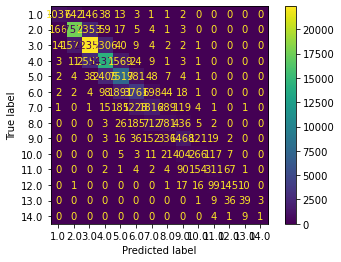

In [17]:
cm=confusion_matrix(data_test["totalPrice"], y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()

0.9066302723103675
0.36674375676306464
0.15007979340101754


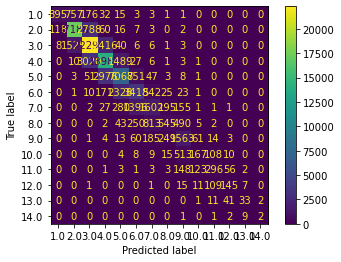

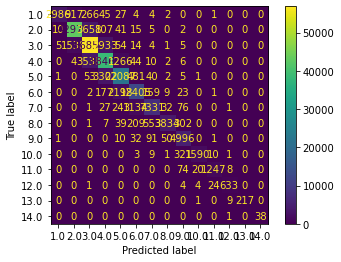

In [38]:
clf = RandomForestClassifier(n_estimators=70, criterion="gini", max_depth=16, random_state=0)
clf.fit(data_train.drop("totalPrice", axis=1), data_train["totalPrice"])
y_pred=clf.predict(data_test.drop("totalPrice", axis=1))
print(r2_score(data_test["totalPrice"], y_pred))
y_pred=clf.predict(data_test.drop("totalPrice", axis=1))
cm=confusion_matrix(data_test["totalPrice"], y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()
print(mean_squared_error(data_test["totalPrice"], y_pred))
y_pred=clf.predict(data_train.drop("totalPrice", axis=1))
print(mean_squared_error(data_train["totalPrice"], y_pred))
cm=confusion_matrix(data_train["totalPrice"], y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()